In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [3]:
df=pd.read_csv(r"C:\Users\user\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
df.head(30)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


## Checking nulls and info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


no null values present.

## Relationship between features

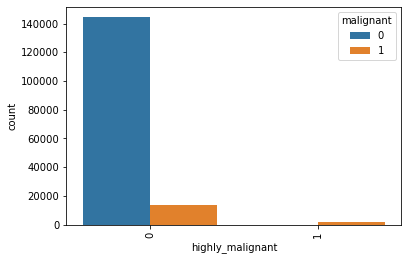

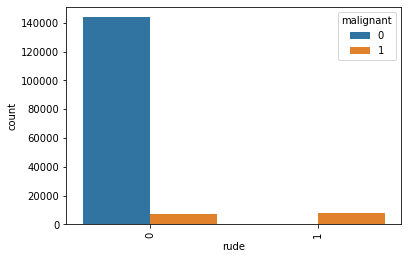

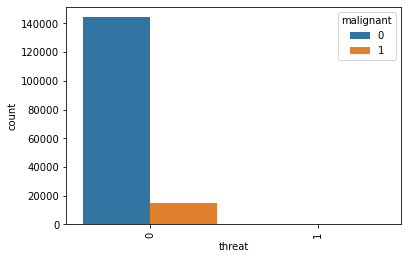

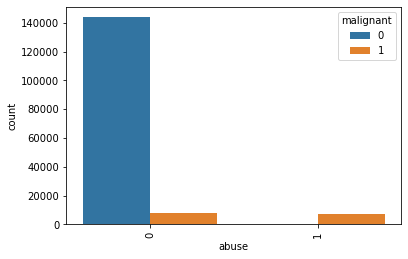

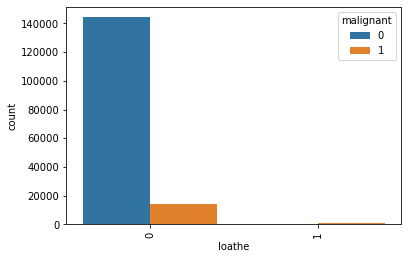

In [5]:
category=['highly_malignant','rude','threat','abuse','loathe']
#Plotting count plot for each feature
for i in category:
    a=sns.countplot(x=df[i],hue=df['malignant'],data=df)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

## Describing the data

In [14]:
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking correlation between features

In [15]:
df.corr().abs()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

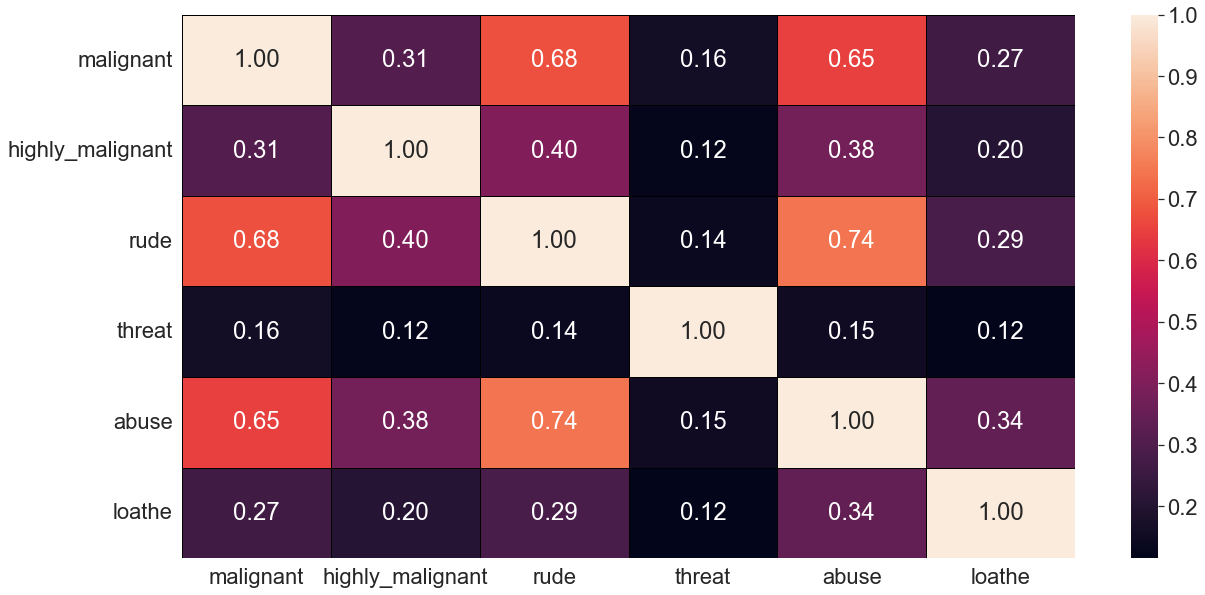

In [20]:
# Plotting heat map for better analysis
sns.set(font_scale=2)
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

It doesnot seem that multicollinearity exists. Since all are the categorical features so we dont need to check for outliers and skewness.

## Data Balancing

In [18]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

Data is highly imbalanced so we would balance it now.

In [19]:
from sklearn.utils import resample

NoMalignant=df[df.malignant==0]
YesMalignant=df[df.malignant==1]
Yes_upsampled=resample(YesMalignant,replace=True,n_samples=len(NoMalignant),random_state=27)
df_up=pd.concat([NoMalignant,Yes_upsampled])
df_up['malignant'].value_counts()

0    144277
1    144277
Name: malignant, dtype: int64

## Feature engineering 

Analysing comment_text feature

In [20]:
#converting all the comments to lower case so thats its easy to analyse them.
df_up['comment_text']=df_up['comment_text'].str.lower()

In [21]:
#Replacing email address,links, phone numbers, any sort of numbers and currency as they are not abusive or malignant comments
df_up['comment_text'] = df_up['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailid')
df_up['comment_text'] = df_up['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','link')
df_up['comment_text'] = df_up['comment_text'].str.replace(r'£|\$', 'currency')   
df_up['comment_text'] = df_up['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phno')
df_up['comment_text'] = df_up['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')                                  
                                 

In [22]:
df_up['comment_text']

0         explanation edits made username hardcore metal...
1         d'aww! match background colour i'm seemingly s...
2         hey man, i'm really trying edit war. guy const...
3         can't make real suggestion improvement wondere...
4           you, sir, hero. chance remember page that's on?
                                ...                        
115860    gross bitch ever came would throw gross as pav...
130910    "*a-hem*... ""nigger nigger nigger, nigger nig...
37514                  breakdown sex act porn actress film.
15549     bollock bollock bollock bollock bollock bolloc...
90727     plan ask advice, assume situation know sides, ...
Name: comment_text, Length: 288554, dtype: object

In [23]:
#Removing punctuations
df_up['comment_text'] = df_up['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
# Removing stop words
sw = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_up['comment_text'] = df_up['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in sw))

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [25]:
lm=WordNetLemmatizer()
df_up['comment_text'] = df_up['comment_text'].apply(lambda x: ' '.join(
 lm.lemmatize(t) for t in x.split()))

In [26]:
 slang= df_up['comment_text'][df_up['malignant']==1]
print(slang)

52729                       though freinds undo backstabber
38282     elinord, kp botany teadrinker fucken piece shi...
39669     personal opinion fucking wanker hope die painf...
155370    shut up! fuck sake edited article i've never e...
49615                                  hi fuck you, faggot.
                                ...                        
115860     gross bitch ever came would throw gross pavement
130910    "*a-hem*... ""nigger nigger nigger, nigger nig...
37514                  breakdown sex act porn actress film.
15549     bollock bollock bollock bollock bollock bolloc...
90727     plan ask advice, assume situation know sides, ...
Name: comment_text, Length: 144277, dtype: object


In [27]:
# Convert text into vectors using TFIDF

tfidf = TfidfVectorizer(max_features = 10000, stop_words='english')
text_feature = tfidf.fit_transform(df_up['comment_text'])
x = text_feature

In [28]:
y=df_up['malignant']

## Train test split

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
max_ac=0
randomState=0
lr=LogisticRegression()
for i in range(10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))
        if round(accuracy_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(accuracy_score(y_test,pred_test)*100,1)
    print("\n\n Best accuracy at random state-",i)
    print("\nTrain Accuracy- ",round(accuracy_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(accuracy_score(y_test,pred_test)*100,1))



 Best accuracy at random state- 0

Train Accuracy-  94.8

Test Accuracy-  94.0


 Best accuracy at random state- 1

Train Accuracy-  94.7

Test Accuracy-  94.0


 Best accuracy at random state- 2

Train Accuracy-  94.7

Test Accuracy-  94.0


 Best accuracy at random state- 3

Train Accuracy-  94.7

Test Accuracy-  94.1


 Best accuracy at random state- 4

Train Accuracy-  94.8

Test Accuracy-  94.1


 Best accuracy at random state- 5

Train Accuracy-  94.7

Test Accuracy-  94.0


 Best accuracy at random state- 6

Train Accuracy-  94.7

Test Accuracy-  94.0


 Best accuracy at random state- 7

Train Accuracy-  94.7

Test Accuracy-  94.0


 Best accuracy at random state- 8

Train Accuracy-  94.7

Test Accuracy-  94.1


 Best accuracy at random state- 9

Train Accuracy-  94.8

Test Accuracy-  94.1


## Logistic Regression

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=round(accuracy_score(y_train,pred_train)*100,1)
test_accuracy=round(accuracy_score(y_test,pred_test)*100,1)
print("\ntrain accuracy-",train_accuracy)
print("\ntest accuracy-",test_accuracy)


train accuracy- 94.7

test accuracy- 94.1


## Cross Validation Score

In [31]:
for i in range(4,6):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_accuracy)



At cv- 4

 cross validation score is- 93.96750721477338

 Accuracy score is- 94.1


At cv- 5

 cross validation score is- 94.02399584944227

 Accuracy score is- 94.1


In [32]:
cv_score_best=cross_val_score(lr,x,y,cv=5).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for logistic regression model is-",test_accuracy)

cross validation score is- 94.02399584944227
accuracy score for logistic regression model is- 94.1


## Confusion Matrix

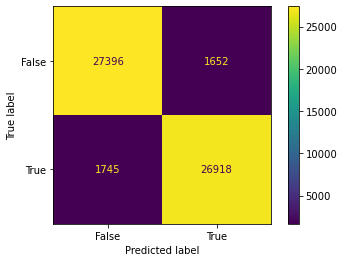

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

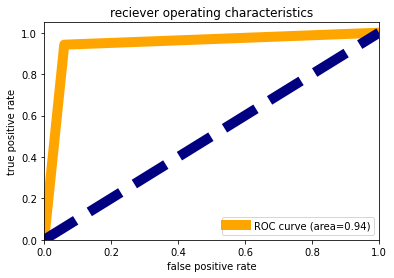

In [34]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [35]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     29048
           1       0.94      0.94      0.94     28663

    accuracy                           0.94     57711
   macro avg       0.94      0.94      0.94     57711
weighted avg       0.94      0.94      0.94     57711



## Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred_train=dt.predict(x_train)
dt_pred_test=dt.predict(x_test)
dt_acc_train=round(accuracy_score(y_train,dt_pred_train)*100,1)
dt_acc_test=round(accuracy_score(y_test,dt_pred_test)*100,1)
print("acc train",dt_acc_train)
print("acc test",dt_acc_test)

acc train 99.8
acc test 96.7


## Confusion Matrix

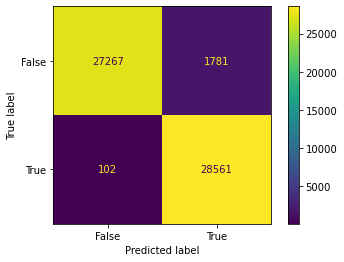

In [38]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

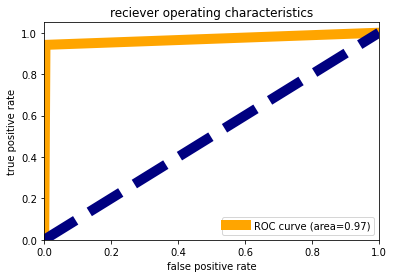

In [39]:
fpr,tpr,thresholds=roc_curve(dt_pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [40]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     29048
           1       0.94      1.00      0.97     28663

    accuracy                           0.97     57711
   macro avg       0.97      0.97      0.97     57711
weighted avg       0.97      0.97      0.97     57711



## Knn Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
knn.fit(x_train,y_train)
pred_train=knn.predict(x_train)
pred_test=knn.predict(x_test)
knn_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
knn_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",knn_train_acc)
print("\nTest Accuracy- ",knn_test_acc)


Train Accuracy-  91.1

Test Accuracy-  85.2


## Cross Validation Score

In [47]:
cv_score_best_knn=cross_val_score(knn,x,y,cv=11).mean()*100
print("cross validation score is-",cv_score_best_knn)
print("accuracy score for Knn classifier model is-",knn_test_acc)

cross validation score is- 86.37585674357695
accuracy score for Knn classifier model is- 85.2


## Confusion Matrix

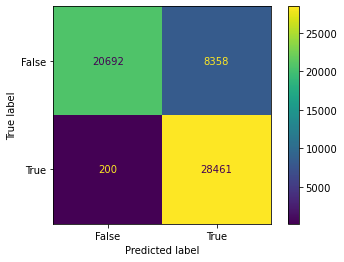

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

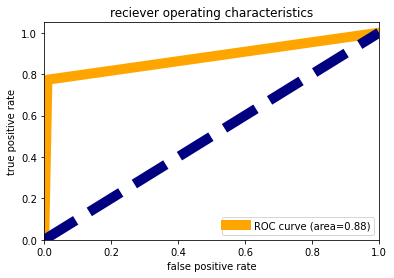

In [45]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [46]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     29050
           1       0.77      0.99      0.87     28661

    accuracy                           0.85     57711
   macro avg       0.88      0.85      0.85     57711
weighted avg       0.88      0.85      0.85     57711



## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
rf_train_acc=round(accuracy_score(y_train,pred_train)*100,1)
rf_test_acc=round(accuracy_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",rf_train_acc)
print("\nTest Accuracy- ",rf_test_acc)


Train Accuracy-  99.8

Test Accuracy-  98.9


## Confusion Matrix

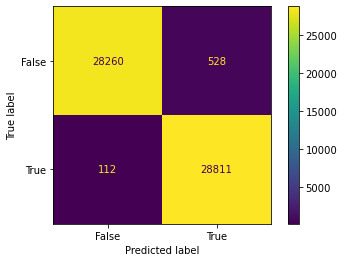

In [51]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

## AUC-ROC Curve

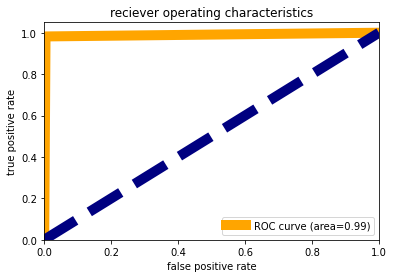

In [52]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label="ROC curve (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characteristics")
plt.legend(loc="lower right")
plt.show()

## Classification Report

In [53]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28788
           1       0.98      1.00      0.99     28923

    accuracy                           0.99     57711
   macro avg       0.99      0.99      0.99     57711
weighted avg       0.99      0.99      0.99     57711



## Model Summary

In [55]:
models=['Logistic Regression','Decision Tree Classifier','Knn Classifier','Random Forest Classifier']
test_acc=[test_accuracy,dt_acc_test,knn_test_acc,rf_test_acc]
dfm=pd.DataFrame(list(zip(models,test_acc)),columns=['Models','Test Accuracy'])
dfm

,Models,Test Accuracy
0,Logistic Regression,94.1
1,Decision Tree Classifier,96.7
2,Knn Classifier,85.2
3,Random Forest Classifier,98.9


•	Since random forest classifier is giving best accuracy already so we will not apply hyper parameter tuning on dataset as the dataset is very large and time consuming and scope of accuracy improvement is not much high. So, we will save random forest classifier model.

## Model Summary

In [56]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

## Applying the model on the testing data

In [57]:
df=pd.read_csv(r"C:\Users\user\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")
df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [60]:
#Cleaning comment_text feature
df['comment_text']=df['comment_text'].str.lower()
#Replacing email address,links, phone numbers, any sort of numbers and currency as they are not abusive or malignant comments
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailid')
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','link')
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'currency')   
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phno')
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')      
#Removing punctuations
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))
# Removing stop words
sw = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in sw))
lm=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
 lm.lemmatize(t) for t in x.split()))


In [61]:
# Convert text into vectors using TFIDF

tfidf = TfidfVectorizer(max_features = 10000, stop_words='english')
text_feature = tfidf.fit_transform(df['comment_text'])
x = text_feature

In [62]:
# Applying Random Forest Classifier Model
pred_malignant=rf.predict(x)
pred_malignant

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [63]:
df['malignant']=pred_malignant

In [64]:
df

,id,comment_text,malignant
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,0
1,0000247867823ef7,"== rfc == title fine is, imo.",0
2,00013b17ad220c46,== source == zawe ashton lapland —,0
3,00017563c3f7919a,":if look back source, information updated corr...",0
4,00017695ad8997eb,anonymously edit article all.,1
...,...,...,...
153159,fffcd0960ee309b5,"totally agree, stuff nothing too-long-crap",0
153160,fffd7a9a6eb32c16,== throw field home plate. == get faster throw...,1
153161,fffda9e8d6fafa9e,== okinotorishima category == see change agree...,0
153162,fffe8f1340a79fc2,"== """"one founding nation eu germany law return...",0


## Saving this test df as a csv file

In [66]:
df.to_csv("test_data.csv")